In [ ]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from nltk.corpus import stopwords

In [ ]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

In [ ]:
# 1. Hacer pre-procesamiento del texto

In [26]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect_agru = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_agru = tfidf_vect_agru.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf_agru.toarray(), columns=tfidf_vect_agru.get_feature_names())
#tfidf_matrix

In [ ]:
# 2. Método del codo para determinar  𝐾 

Calculando para k=1
Calculando para k=2
Calculando para k=3
Calculando para k=4
Calculando para k=5
Calculando para k=6
Calculando para k=7
Calculando para k=8
Calculando para k=9
Calculando para k=10
Calculando para k=11
Calculando para k=12
Calculando para k=13
Calculando para k=14
Calculando para k=15
Calculando para k=16
Calculando para k=17
Calculando para k=18
Calculando para k=19


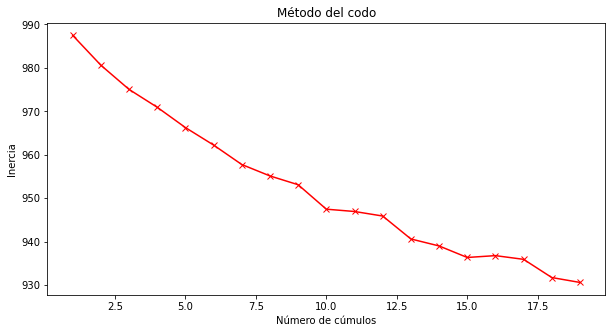

In [27]:
ks = []
k_inertia = []

for k in range(1,20):
    print(f"Calculando para k={k}")
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))    
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-', color = 'red')

In [ ]:
# 3. Entrenar modelo con el  𝐾  escogido

In [28]:
k = 7
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=7)

In [29]:
len (model.cluster_centers_[0])

3666

In [30]:
data['cluster'] = model.labels_
#data.head()

model.cluster_centers_

array([[-2.16840434e-19,  2.16840434e-19,  5.42101086e-20, ...,
         5.42101086e-20,  4.33680869e-19,  5.63601670e-03],
       [ 2.25028178e-03,  4.33680869e-19,  5.42101086e-20, ...,
         1.08420217e-19,  6.67058111e-03,  0.00000000e+00],
       [ 6.02509427e-04,  7.34320826e-04,  5.61505762e-04, ...,
         5.10012224e-04,  1.54539137e-03,  2.06476155e-03],
       ...,
       [-5.42101086e-19,  2.16840434e-19,  1.08420217e-19, ...,
         5.42101086e-20,  4.34818263e-03,  0.00000000e+00],
       [-4.33680869e-19,  2.16840434e-19,  1.08420217e-19, ...,
         5.42101086e-20,  2.61931308e-03, -2.16840434e-19],
       [-1.08420217e-19,  1.86824763e-02,  5.42101086e-20, ...,
         5.42101086e-20,  3.05653000e-03,  0.00000000e+00]])

In [31]:
nbrs = NearestNeighbors(n_neighbors=4, metric="euclidean").fit(tfidf_matrix.values)

In [32]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)
 
centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect_agru.get_feature_names()

 
print(f"CLUSTERS:\n")
for i in range(k):
    print(f"Cluster #{i}")
    print(f"{clust_cnt[i]} textos ({clust_cnt_pct[i]:.2%} de los datos)")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :15]:
        print(f"{terms[idx]}", end=" ")
    print("\n")
    print(f"Textos Representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['review_body'].values:
        print(f"* {texto}")
    print("\n")

CLUSTERS:

Cluster #0
53 textos (5.30% de los datos)
TERMINOS:  perfecto llegó tiempo gracias producto tamaño sido rápido justo recomendable juego rapido poner funciona igual 

Textos Representativos
* Todo en perfecto estado
* Perfecto y en tiempo
* Llegó a tiempo y en perfecto estado
* Todo ha sido perfecto.


Cluster #1
59 textos (5.90% de los datos)
TERMINOS:  bonitos grandes pequeños plata tamaño pendientes demasiado foto quedan mas bien imaginaba tal favorecedores esperaba 

Textos Representativos
* Bonitos productos ..pero demasiado pequeños
* Son bonitos, pero son mucho más pequeños de lo que se aprecia en la foto
* Los más grandes que hay son muy pequeños.
* Pequeño pero muy bonitos


Cluster #2
531 textos (53.10% de los datos)
TERMINOS:  juego si producto regalo mando solo foto esperaba mas jugar buen aunque bonita gustado caja 

Textos Representativos
* Esperaba más del juego.
* El juego en sí es increíble. A estas alturas de la generación poco más se puede decir salvo que e

In [56]:
# Visualización usando PCA
! pip install plotly

In [33]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'jewelry': 'blue',
             'Envios': 'black',
             'Calidad': 'red',
             'video_games': 'green'}

cols = data['cluster'].map(colorsIdx)

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=cols)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [ ]:
# Comparación

In [14]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

In [34]:
test_trans = tfidf_vect_agru.transform(test)
[clusters[i] for i in model.predict(test_trans)]

NameError: name 'clusters' is not defined

In [35]:
data.product_category.value_counts()

jewelry        502
video_games    498
Name: product_category, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [37]:
train, test = train_test_split(data, test_size=0.2, random_state=42) #0.2 tamaño muestra random_state=42 -semilla
print(f"Tenemos {data.shape[0]} datos en total.")

Tenemos 1000 datos en total.


In [38]:
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.") #80%
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")# 20%

El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


In [39]:
tfidf_vect1 = TfidfVectorizer(preprocessor=pre_procesado) #para el preprocesador de texto y transformación numerica
#pasar del preprocesado a pasarlo a valores numericos
tfidf_vect1.fit(train.review_body.values); #enviar directamente a tfidf con el preprocessor sobr

In [40]:
X_train = tfidf_vect1.transform(train.review_body.values) #fit transform entrena los datos y despues se transforma, lee lo que esta en xtrain y hace la conversion de las palabras
y_train = train.product_category.values #transform todo tenga el mismo preprocesamiento tanto los datos de test y train

X_test = tfidf_vect1.transform(test.review_body.values) # sobre las palabras que el modelo conoce ya
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [43]:
nb = MultinomialNB()

In [44]:
nb.fit(X_train, y_train)

MultinomialNB()

In [45]:
y_pred_nb = nb.predict(X_test)


print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()


Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.81      0.95      0.87        97
 video_games       0.94      0.79      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200




Text(0.5, 1.0, 'Naive Bayes')

<Figure size 576x576 with 0 Axes>

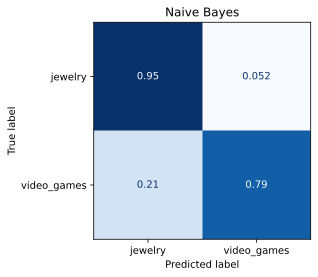

In [46]:
# visualizacion
%config InlineBackend.figure_format = 'svg' 

fig = plt.figure(figsize=(8,8)) 

plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

In [47]:
# Resultados
nuevos = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevos_trans = tfidf_vect1.transform(nuevos)
nb.predict(nuevos_trans)
# nb.predict_proba(nuevos_trans)

array(['video_games', 'jewelry'], dtype='<U11')